<a href="https://colab.research.google.com/github/natka67/PUM/blob/main/credit_score_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [291]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('train.csv')
#df_train.drop(columns = ['SSN', 'ID', 'Customer_ID'], inplace = True )
print('Train data: ', df_train.shape)
df_train.drop_duplicates(subset="ID", inplace=True)
print('Train data without duplicates: ', df_train.shape)
print('Test data: ',df_test.shape)

<ipython-input-291-925a9ba08975>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


Train data:  (100000, 28)
Train data without duplicates:  (100000, 28)
Test data:  (100000, 28)


<ipython-input-291-925a9ba08975>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('train.csv')


In [292]:
categorical_col = ['Occupation',  'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

agg_funcs = {col: lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan for col in categorical_col}
users = df_train.groupby('Customer_ID').agg(agg_funcs).reset_index()
users

,Customer_ID,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,CUS_0x1000,Lawyer,Bad,Yes,High_spent_Medium_value_payments
1,CUS_0x1009,Mechanic,Standard,Yes,High_spent_Medium_value_payments
2,CUS_0x100b,Media_Manager,Good,No,High_spent_Large_value_payments
3,CUS_0x1011,Doctor,Standard,Yes,Low_spent_Medium_value_payments
4,CUS_0x1013,Mechanic,Good,No,High_spent_Medium_value_payments
...,...,...,...,...,...
12495,CUS_0xff3,Scientist,Good,No,Low_spent_Small_value_payments
12496,CUS_0xff4,Entrepreneur,Standard,Yes,Low_spent_Small_value_payments
12497,CUS_0xff6,Doctor,Good,No,High_spent_Small_value_payments
12498,CUS_0xffc,Musician,Bad,Yes,High_spent_Large_value_payments


In [293]:
df_train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [294]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [295]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [296]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [297]:
categorical_to_numbers = ['Month', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
numeric_columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
                   'Interest_Rate', 'Num_of_Loan',
                   'Num_of_Delayed_Payment',
                   'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance',
                   'Changed_Credit_Limit']

for column in numeric_columns:
  print(column)
  df_train[column] = df_train[column].astype(str)
  df_train[column] = df_train[column].str.replace('_', '')
  if column == 'Changed_Credit_Limit':
    df_train[column] = df_train[column].replace('', np.nan)
  df_train[column] = df_train[column].astype(float)
  #df_train[column] = df_train[column].fillna(df_train[column].mean())
numeric_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
#df_train[numeric_columns] = df_train[numeric_columns].apply(pd.to_numeric)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance
Changed_Credit_Limit


In [298]:
def convert_to_months(value):
    parts = str(value).split(' ')
    years = float(parts[0])
    months = float(parts[3]) if len(parts) > 3 else 0
    return 12*years+months
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(convert_to_months)

In [299]:
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

<Axes: xlabel='Changed_Credit_Limit', ylabel='Count'>

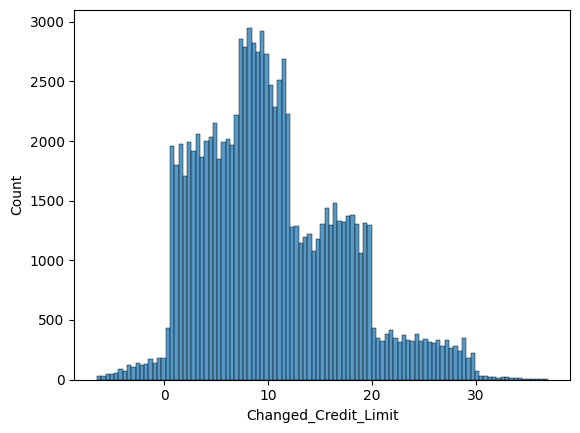

In [300]:
sns.histplot(data=df_train[df_train['Changed_Credit_Limit']>=-7], x = 'Changed_Credit_Limit')

In [301]:
"""ranges = {
    'Age': (0, 110),
    'Annual_Income': (0, np.inf),
    'Num_Bank_Accounts': (0, 11),
    'Num_Credit_Card': (0, 20),
    'Num_of_Loan': (0, 30),
    'Num_of_Delayed_Payment': (0, 30),
    'Outstanding_Debt': (0, np.inf),
    'Amount_invested_monthly': (0, 4000),
    'Monthly_Balance': (0, np.inf),
    'Interest_Rate': (0, 100),
    'Credit_History_Age': (0, np.inf),
    'Credit_Utilization_Ratio': (0, np.inf),
    'Monthly_Inhand_Salary': (0, np.inf),
    'Num_Credit_Inquiries': (0, 100),
    'Total_EMI_per_month': (0, 200000),
    'Changed_Credit_Limit': (-1000, 1000)
    }

def replace_nulls_and_outliers(df, ranges):

  for col, (min_val, max_val) in ranges.items():
    valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]
    mean_value = valid_values.mean() if not valid_values.empty else None
    print(col, df.shape[0], valid_values.shape[0], mean_value)

    df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value
    df[col].fillna(mean_value, inplace=True)

  return df

df_train = replace_nulls_and_outliers(df_train, ranges)"""

"ranges = {\n    'Age': (0, 110),\n    'Annual_Income': (0, np.inf),\n    'Num_Bank_Accounts': (0, 11),\n    'Num_Credit_Card': (0, 20),\n    'Num_of_Loan': (0, 30),\n    'Num_of_Delayed_Payment': (0, 30),\n    'Outstanding_Debt': (0, np.inf),\n    'Amount_invested_monthly': (0, 4000),\n    'Monthly_Balance': (0, np.inf),\n    'Interest_Rate': (0, 100),\n    'Credit_History_Age': (0, np.inf),\n    'Credit_Utilization_Ratio': (0, np.inf),\n    'Monthly_Inhand_Salary': (0, np.inf),\n    'Num_Credit_Inquiries': (0, 100),\n    'Total_EMI_per_month': (0, 200000),\n    'Changed_Credit_Limit': (-1000, 1000)\n    }\n\ndef replace_nulls_and_outliers(df, ranges):\n\n  for col, (min_val, max_val) in ranges.items():\n    valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]\n    mean_value = valid_values.mean() if not valid_values.empty else None\n    print(col, df.shape[0], valid_values.shape[0], mean_value)\n\n    df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value\

In [302]:
import numpy as np

def replace_nulls_and_outliers_with_iqr(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        min_val = Q1 - 1.5 * IQR
        max_val = Q3 + 1.5 * IQR

        valid_values = df[col][(df[col] >= min_val) & (df[col] <= max_val)]
        mean_value = valid_values.mean() if not valid_values.empty else None
        df.loc[(df[col] < min_val) | (df[col] > max_val), col] = mean_value
        df[col].fillna(mean_value, inplace=True)

        print(col, df.shape[0], valid_values.shape[0], mean_value)
    return df

df_train  = replace_nulls_and_outliers_with_iqr(df_train)


Age 100000 97219 33.32000946317078
Annual_Income 100000 97217 48346.570873972654
Monthly_Inhand_Salary 100000 83315 3999.7628560378407
Num_Bank_Accounts 100000 98685 5.367624259005928
Num_Credit_Card 100000 97729 5.533321736639073
Interest_Rate 100000 97966 14.531602800971767
Num_of_Loan 100000 95652 3.533757788650525
Delay_from_due_date 100000 95998 19.47492656097002
Num_of_Delayed_Payment 100000 92262 13.31440896577139
Changed_Credit_Limit 100000 97241 10.250098106765664
Num_Credit_Inquiries 100000 96385 5.78111739378534
Outstanding_Debt 100000 94728 1254.272312304704
Credit_Utilization_Ratio 100000 99996 32.28448047989659
Credit_History_Age 100000 90970 221.19540507859733
Total_EMI_per_month 100000 93205 89.86114148675115
Amount_invested_monthly 100000 85425 155.2565119401302
Monthly_Balance 100000 91164 356.36816876860223


In [303]:
df_train.drop(columns=['ID','Customer_ID','Name', 'SSN'],inplace=True)

In [304]:
for column in df_train.columns:
  print(column, ": ", sum(df_train[column].isnull()))

Month :  0
Age :  0
Occupation :  0
Annual_Income :  0
Monthly_Inhand_Salary :  0
Num_Bank_Accounts :  0
Num_Credit_Card :  0
Interest_Rate :  0
Num_of_Loan :  0
Type_of_Loan :  11408
Delay_from_due_date :  0
Num_of_Delayed_Payment :  0
Changed_Credit_Limit :  0
Num_Credit_Inquiries :  0
Credit_Mix :  0
Outstanding_Debt :  0
Credit_Utilization_Ratio :  0
Credit_History_Age :  0
Payment_of_Min_Amount :  0
Total_EMI_per_month :  0
Amount_invested_monthly :  0
Payment_Behaviour :  0
Monthly_Balance :  0
Credit_Score :  0


In [305]:
df_train['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [306]:
unique_loan_types = set()
df_train['Type_of_Loan'].fillna('Not Specified', inplace=True)

for loan_combo in df_train['Type_of_Loan']:
  if pd.notna(loan_combo):
    loans = loan_combo.replace("and ", '').split(', ')
    unique_loan_types.update(loans)


for loan_type in list(unique_loan_types):
  df_train[loan_type] = df_train['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)

df_train.drop('Type_of_Loan', inplace=True, axis=1)

In [307]:
categorical_col = ['Month', 'Occupation',  'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
df_train= df_train[(df_train['Credit_Score']=='Good') | (df_train['Credit_Score']=='Poor') | (df_train['Credit_Score']=='Standard')]

for column in categorical_col:
  print(column, ": ", len(df_train[column].unique()))
  print(df_train[column].value_counts())

df_train= df_train[(df_train['Credit_Score']=='Good') | (df_train['Credit_Score']=='Poor') | (df_train['Credit_Score']=='Standard')]


Month :  8
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
Occupation :  16
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
Credit_Mix :  4
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64
Payment_of_Min_Amount :  3
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
Payment_Behaviour :  7
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
H

In [308]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in categorical_col:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])

In [309]:
for class_index, class_name in enumerate(label_encoders['Occupation'].classes_):
    print(f"{class_name}: {class_index}")

Accountant: 0
Architect: 1
Developer: 2
Doctor: 3
Engineer: 4
Entrepreneur: 5
Journalist: 6
Lawyer: 7
Manager: 8
Mechanic: 9
Media_Manager: 10
Musician: 11
Scientist: 12
Teacher: 13
Writer: 14
_______: 15


In [310]:
df_train.dtypes

Month                         int64
Age                         float64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
Debt Consolidation Loan       int64
Auto Loan                     int64
Student Loan                  int64
Credit-Builder Loan           int64
Not Specified               

In [311]:
scaler = MinMaxScaler()
columns = df_train.select_dtypes(include=['float', 'int64']).columns.tolist()
columns.remove('Credit_Score')
print(len(columns))

mm_scalers = {}
for column in columns:
    mm_scalers[column] = MinMaxScaler()
    df_train[column] = mm_scalers[column].fit_transform(df_train[column].values.reshape(-1, 1))

31


In [312]:
df_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Score,Debt Consolidation Loan,Auto Loan,Student Loan,Credit-Builder Loan,Not Specified,Personal Loan,Home Equity Loan,Mortgage Loan,Payday Loan
0,0.428571,0.214286,0.8,0.083178,0.125215,0.333333,0.363636,0.060606,0.444444,0.133333,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.285714,0.214286,0.8,0.083178,0.304240,0.333333,0.363636,0.060606,0.444444,0.066667,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.857143,0.460000,0.8,0.083178,0.304240,0.333333,0.363636,0.060606,0.444444,0.133333,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.000000,0.214286,0.8,0.083178,0.304240,0.333333,0.363636,0.060606,0.444444,0.166667,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.000000,0.214286,0.8,0.083178,0.125215,0.333333,0.363636,0.060606,0.444444,0.183333,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.261905,0.6,0.224107,0.251531,0.416667,0.545455,0.181818,0.222222,0.466667,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,1.000000,0.261905,0.6,0.224107,0.251531,0.416667,0.545455,0.181818,0.222222,0.383333,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.714286,0.261905,0.6,0.224107,0.251531,0.416667,0.545455,0.410049,0.222222,0.533333,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.571429,0.261905,0.6,0.224107,0.251531,0.416667,0.545455,0.181818,0.222222,0.416667,...,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
corr_matrix = df_train.corr()
#print(corr_matrix)
pairs = []
for i in range(len(corr_matrix.columns)):
  for j in range(i+1, len(corr_matrix.columns)):
    if abs(corr_matrix.iloc[i, j]) > 0.8:
      pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in pairs:
  print(pair)

df_train.drop(columns=['Annual_Income'], inplace=True)
corr_matrix = df_train.corr()

('Annual_Income', 'Monthly_Inhand_Salary', 0.906305437578578)


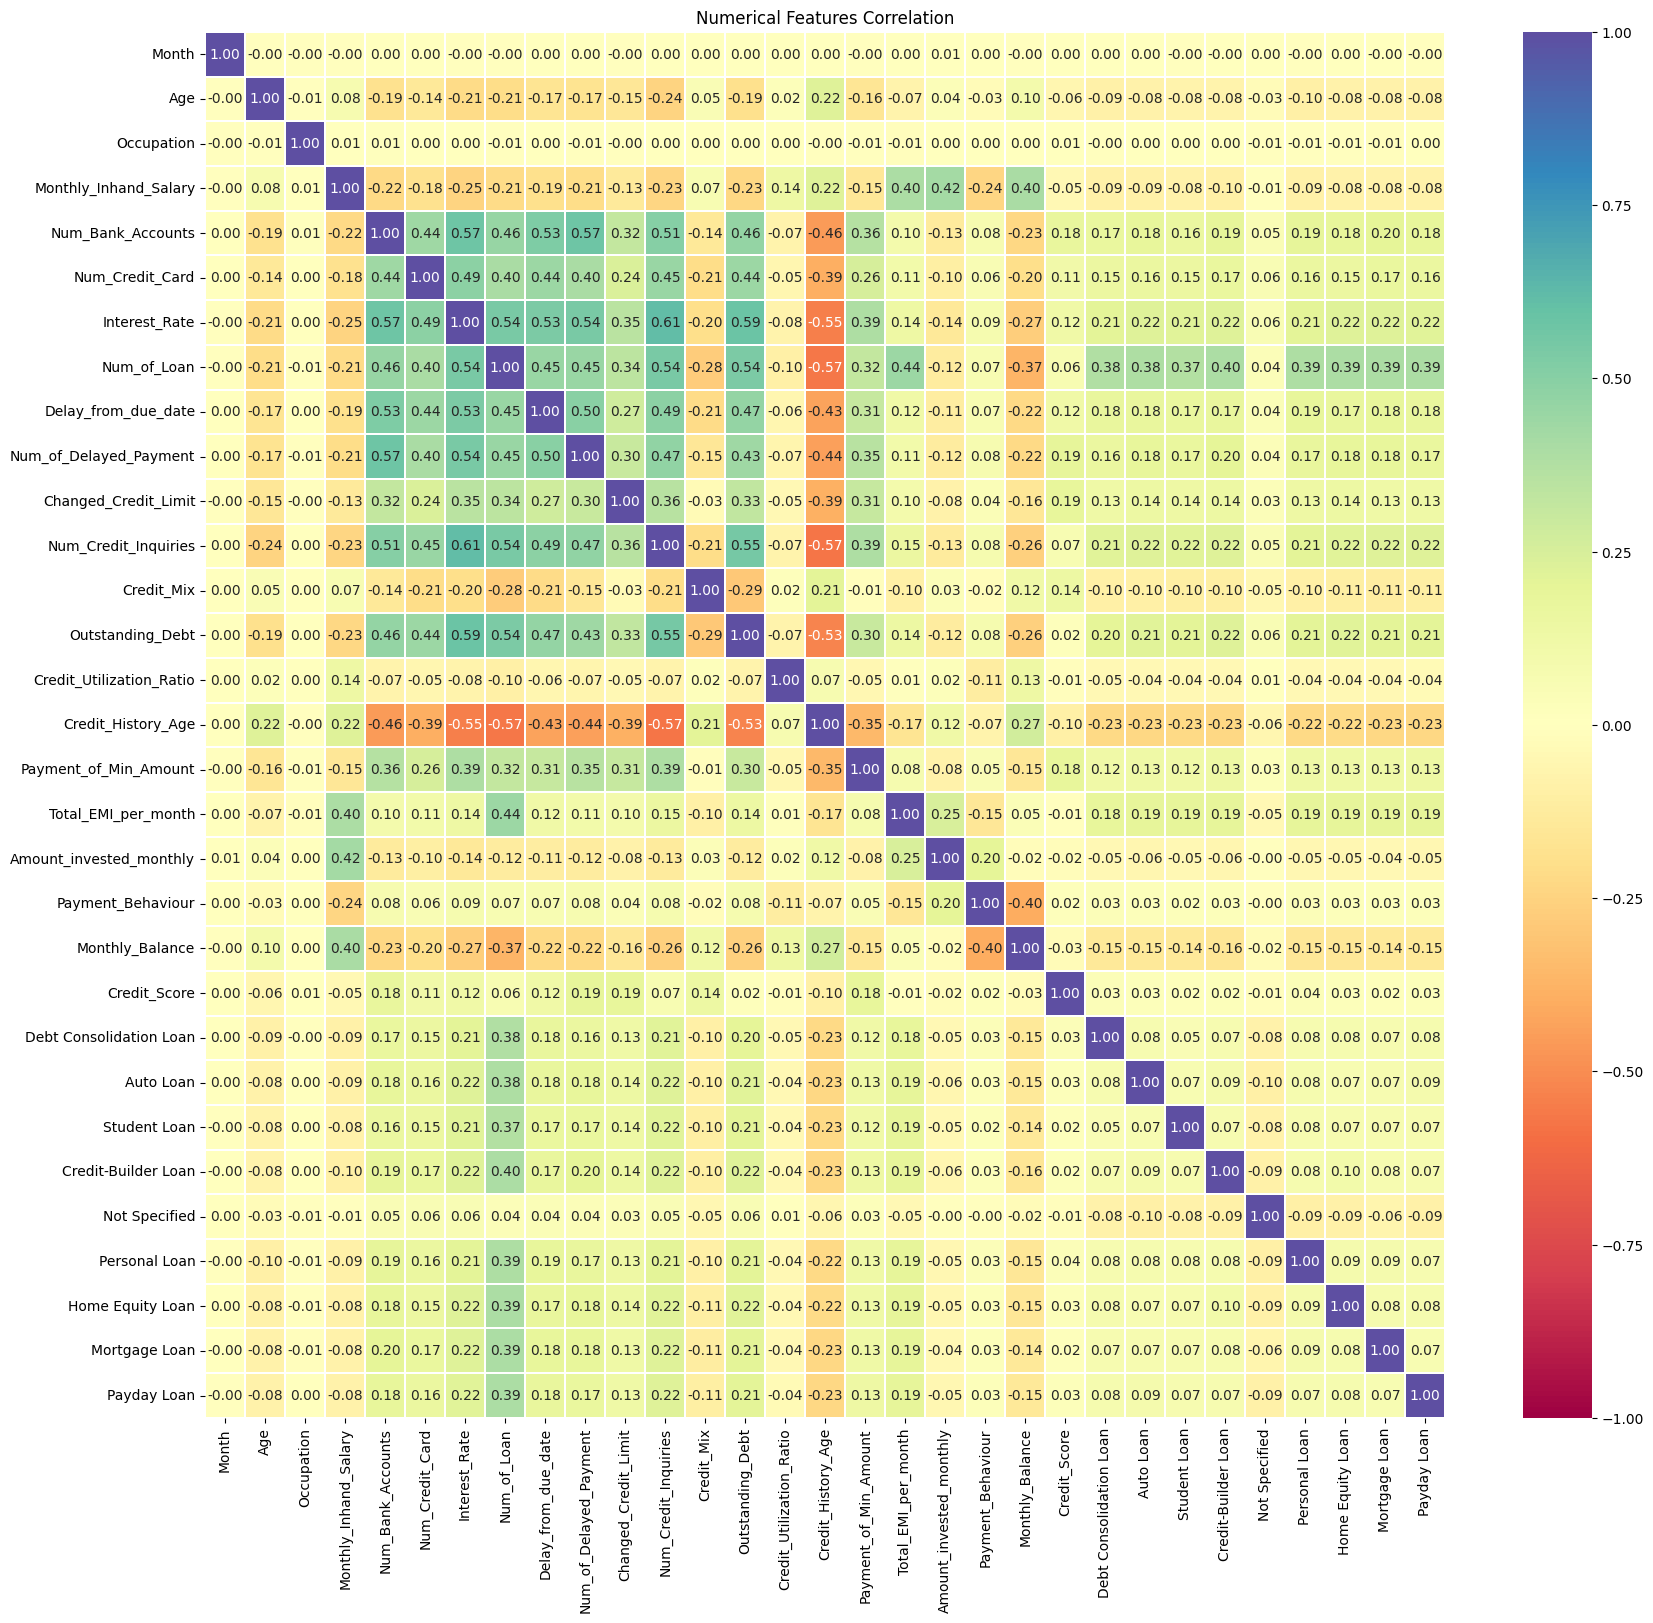

In [314]:
plt.figure(figsize = (20, 18))
sns.heatmap(corr_matrix, annot = True, cmap='Spectral',linewidths = 0.1,vmin=-1, vmax=1,  mask=False, fmt=".2f")
plt.title('Numerical Features Correlation')
plt.show()

In [319]:
corr_df = pd.DataFrame(abs(corr_matrix['Credit_Score'].drop('Credit_Score')).sort_values(ascending=True))
relevant_columns = corr_df[corr_df['Credit_Score']>=0.03].index
list(relevant_columns).append('Credit_Score')
df_train_1 = df_train[relevant_columns]

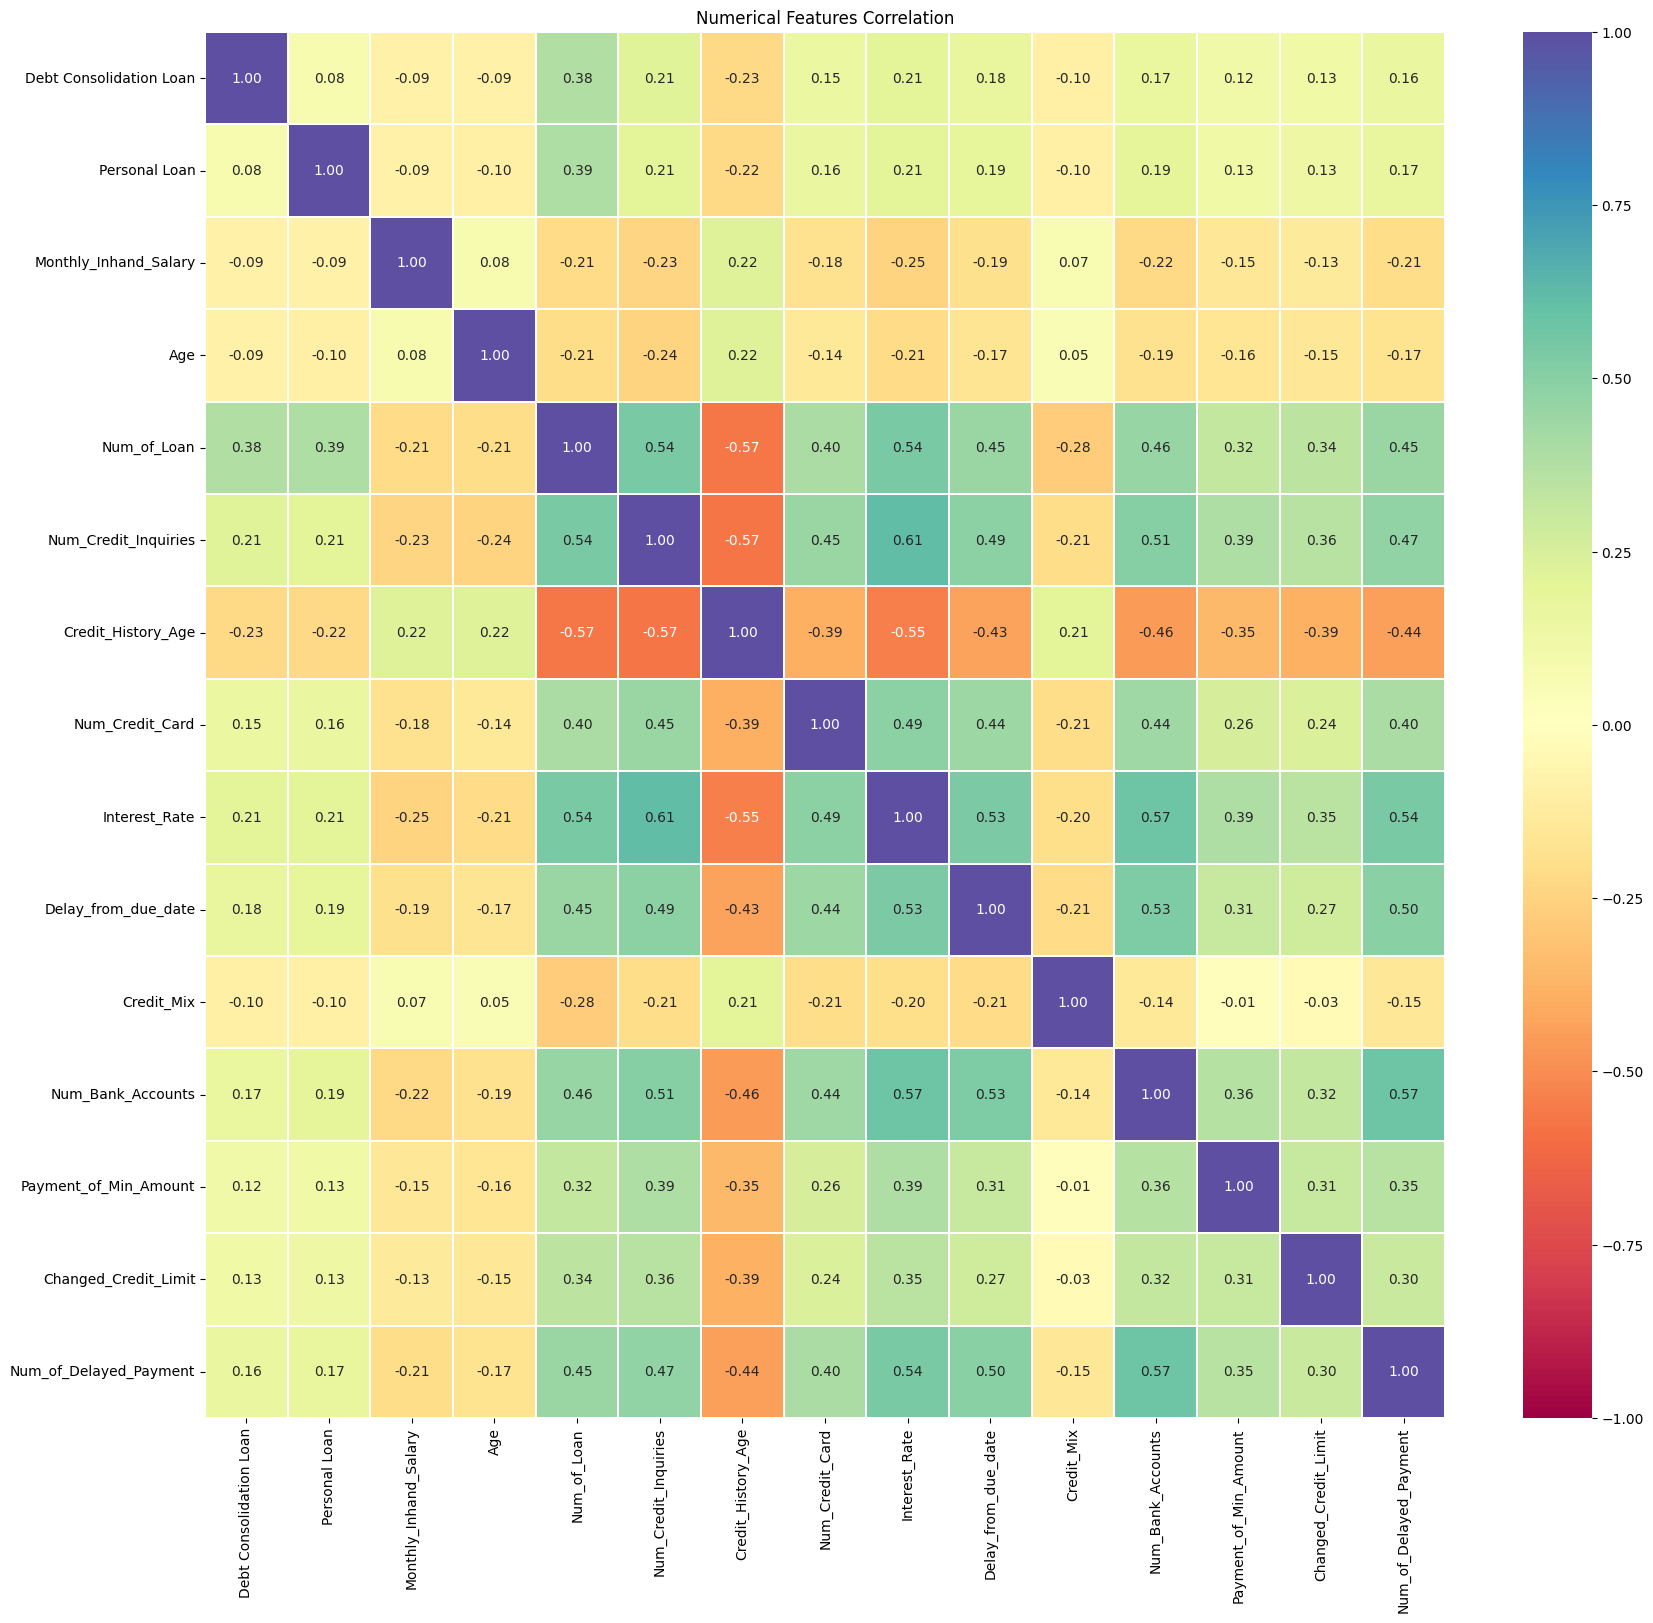

In [320]:
plt.figure(figsize = (20, 18))
sns.heatmap(df_train_1.corr(), annot = True, cmap='Spectral',linewidths = 0.1,vmin=-1, vmax=1,  mask=False, fmt=".2f")
plt.title('Numerical Features Correlation')
plt.show()

In [317]:
df_train_1

,Not Specified,Credit_Utilization_Ratio,Student Loan,Outstanding_Debt,Mortgage Loan,Amount_invested_monthly,Payment_Behaviour,Credit-Builder Loan,Monthly_Balance,Payday Loan,...,Num_Credit_Inquiries,Credit_History_Age,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Credit_Mix,Num_Bank_Accounts,Payment_of_Min_Amount,Changed_Credit_Limit,Num_of_Delayed_Payment
0,0.0,0.234742,0.0,0.201725,0.0,0.145546,0.500000,1.0,0.405613,0.0,...,0.235294,0.655087,0.363636,0.060606,0.133333,1.000000,0.333333,0.5,0.497758,0.322581
1,0.0,0.410984,0.0,0.201725,0.0,0.214079,0.666667,1.0,0.369444,0.0,...,0.235294,0.546391,0.363636,0.060606,0.066667,0.333333,0.333333,0.5,0.497758,0.526271
2,0.0,0.296218,0.0,0.201725,0.0,0.147870,0.833333,1.0,0.429907,0.0,...,0.235294,0.660050,0.363636,0.060606,0.133333,0.333333,0.333333,0.5,0.469173,0.322581
3,0.0,0.391472,0.0,0.201725,0.0,0.361005,1.000000,1.0,0.290034,0.0,...,0.235294,0.662531,0.363636,0.060606,0.166667,0.333333,0.333333,0.5,0.357623,0.225806
4,0.0,0.165060,0.0,0.201725,0.0,0.074968,0.333333,1.0,0.443250,0.0,...,0.235294,0.665012,0.363636,0.060606,0.183333,0.333333,0.333333,0.5,0.497758,0.526271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.504522,1.0,0.125096,0.0,0.110354,0.166667,0.0,0.622866,0.0,...,0.176471,0.935484,0.545455,0.181818,0.466667,1.000000,0.416667,0.5,0.504204,0.322581
99996,0.0,0.707591,1.0,0.125096,0.0,0.098073,0.333333,0.0,0.644654,0.0,...,0.176471,0.937965,0.545455,0.181818,0.383333,1.000000,0.416667,0.5,0.504204,0.322581
99997,0.0,0.731328,1.0,0.125096,0.0,0.043490,0.166667,0.0,0.670818,0.0,...,0.176471,0.940447,0.545455,0.410049,0.533333,0.333333,0.416667,0.5,0.504204,0.290323
99998,0.0,0.469243,1.0,0.125096,0.0,0.455509,0.666667,0.0,0.414272,0.0,...,0.176471,0.942928,0.545455,0.181818,0.416667,0.333333,0.416667,0.5,0.504204,0.526271


In [322]:
import numpy as np
from sklearn.decomposition import PCA
X = df_train.drop(columns =['Credit_Score'])
y = df_train['Credit_Score']
pca = PCA(n_components=7)
df2 = pca.fit(X)
print(pca.explained_variance_ratio_)

[0.17409632 0.08039558 0.06243618 0.06201106 0.06147735 0.06069402
 0.06015002]
